# The goal of this notebook is to download nexrad radar for a particular station and date.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import tempfile
import pytz
from datetime import datetime
import pyart
import nexradaws
templocation = tempfile.mkdtemp()

/Users/benweinstein/.conda/envs/everglades_radar/lib/python3.10/site-packages/botocore/httpsession.py:41: DeprecationWarning: 'urllib3.contrib.pyopenssl' module is deprecated and will be removed in a future release of urllib3 2.x. Read more in this issue: https://github.com/urllib3/urllib3/issues/2680
  from urllib3.contrib.pyopenssl import orig_util_SSLContext as SSLContext


In [8]:
conn = nexradaws.NexradAwsInterface()

In [9]:
years = conn.get_avail_years()
print(years)

['1970', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


There was a large colony event at Alley North () on April 1st, 2021 near the KAMX station in homestead florida

In [12]:
availscans = conn.get_avail_scans('2021', '04', '01', 'KAMX')
print("There are {} NEXRAD files available for May 31st, 2013 for the KAMX radar.\n".format(len(availscans)))
print(availscans[0:4])

There are 314 NEXRAD files available for May 31st, 2013 for the KAMX radar.

[<AwsNexradFile object - 2021/04/01/KAMX/KAMX20210401_000359_V06>, <AwsNexradFile object - 2021/04/01/KAMX/KAMX20210401_000845_V06>, <AwsNexradFile object - 2021/04/01/KAMX/KAMX20210401_001332_V06>, <AwsNexradFile object - 2021/04/01/KAMX/KAMX20210401_001819_V06>]


We want the scans around dawn, when the birds are likely to disperse from the colony

In [15]:
eastern_timezone = pytz.timezone('US/Eastern')
radar_id = 'KAMX'
start = eastern_timezone.localize(datetime(2021,4,1,5,0))
end = eastern_timezone.localize (datetime(2021,4,1,7,0))
scans = conn.get_avail_scans_in_range(start, end, radar_id)
print("There are {} scans available between {} and {}\n".format(len(scans), start, end))
print(scans[0:4])

There are 27 scans available between 2021-04-01 05:00:00-04:00 and 2021-04-01 07:00:00-04:00

[<AwsNexradFile object - 2021/04/01/KAMX/KAMX20210401_090405_V06>, <AwsNexradFile object - 2021/04/01/KAMX/KAMX20210401_090850_V06>, <AwsNexradFile object - 2021/04/01/KAMX/KAMX20210401_091336_V06>, <AwsNexradFile object - 2021/04/01/KAMX/KAMX20210401_091822_V06>]


In [14]:
results = conn.download(scans[0:4], templocation)

Downloaded KAMX20210401_091336_V06
Downloaded KAMX20210401_090405_V06
Downloaded KAMX20210401_091822_V06
Downloaded KAMX20210401_090850_V06
4 out of 4 files downloaded...0 errors


# Visualize scans

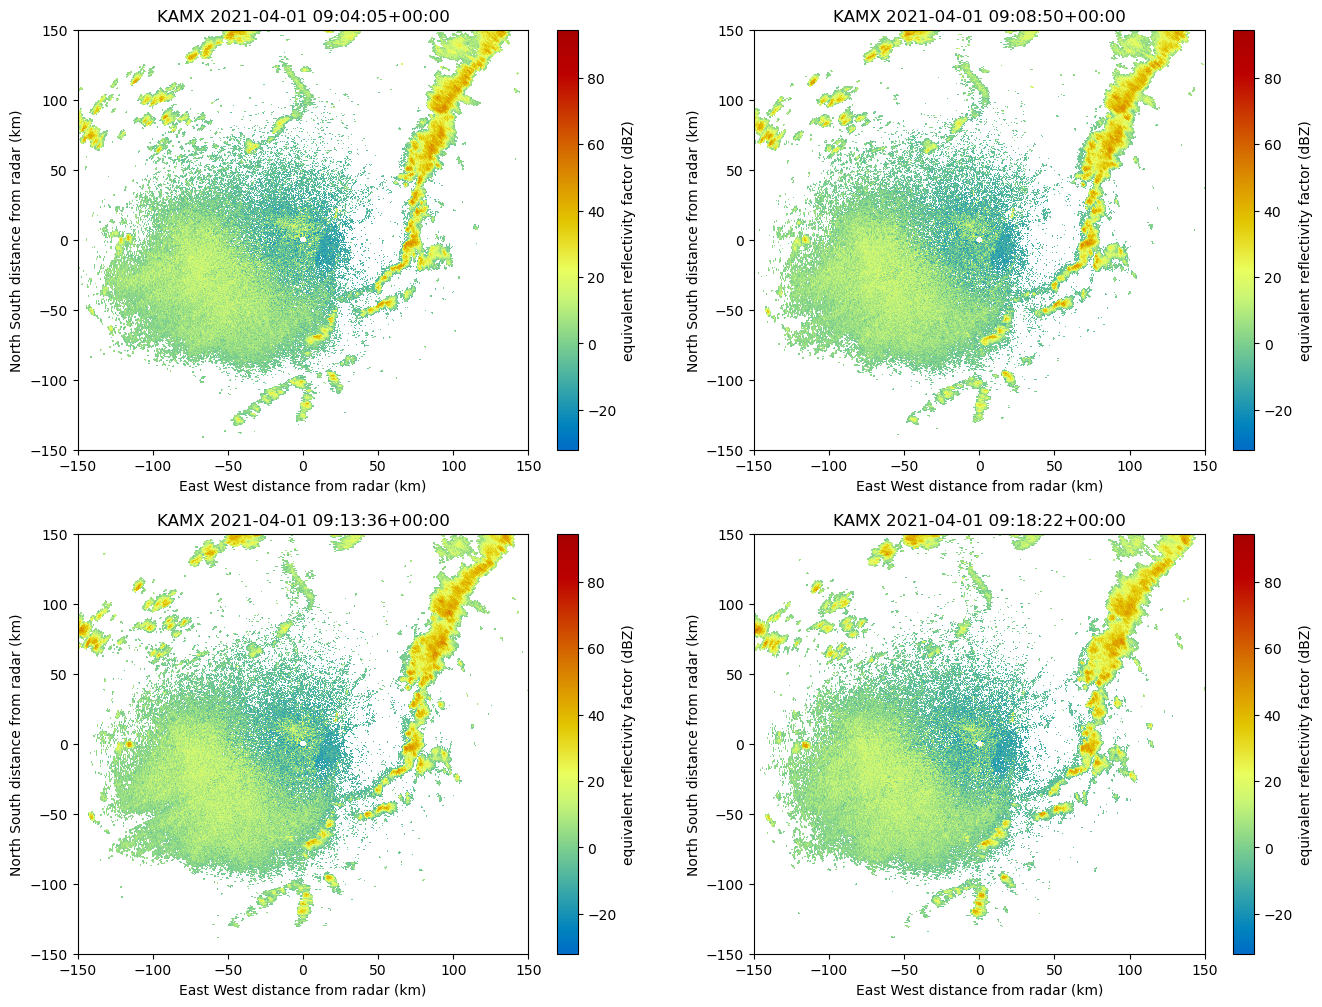

In [17]:
fig = plt.figure(figsize=(16,12))
for i,scan in enumerate(results.iter_success(),start=1):
    ax = fig.add_subplot(2,2,i)
    radar = scan.open_pyart()
    display = pyart.graph.RadarDisplay(radar)
    display.plot('reflectivity',0,ax=ax,title="{} {}".format(scan.radar_id,scan.scan_time))
    display.set_limits((-150, 150), (-150, 150), ax=ax)

# Visualize velocity

In [ ]:
fig = plt.figure(figsize=(16,12))
for i,scan in enumerate(results.iter_success(),start=1):
    ax = fig.add_subplot(2,2,i)
    radar = scan.open_pyart()
    display = pyart.graph.RadarDisplay(radar)
    display.plot('velocity',1,ax=ax,title="{} {}".format(scan.radar_id,scan.scan_time))
    display.set_limits((-150, 150), (-150, 150), ax=ax)